Import Libraries

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import math

EDA & Data Preparation

In [3]:
data = pd.read_csv('/content/data.csv')

In [4]:
data.shape

(54, 4)

In [5]:
data.head(10)

,Date,Revenue,UNRATE,PPI
0,1/1/2017,11141.566,4.7,91.6
1,2/1/2017,11483.520,4.6,95.4
2,3/1/2017,89026.192,4.4,97.8
3,4/1/2017,7486.732,4.5,94.1
4,5/1/2017,17719.978,4.4,95.1
5,6/1/2017,159129.659,4.3,92.6
6,7/1/2017,16736.302,4.3,93.6
7,8/1/2017,25432.066,4.4,91.6
8,9/1/2017,145620.785,4.2,91.2
9,10/1/2017,24954.743,4.1,91.3


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     54 non-null     object 
 1   Revenue  54 non-null     float64
 2   UNRATE   54 non-null     float64
 3   PPI      54 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.8+ KB


In [7]:
#data.index = pd.DatetimeIndex(data['Date'])
data_use = data[['Revenue','UNRATE','PPI']]

In [8]:
data_use.shape

(54, 3)

Data Visualization

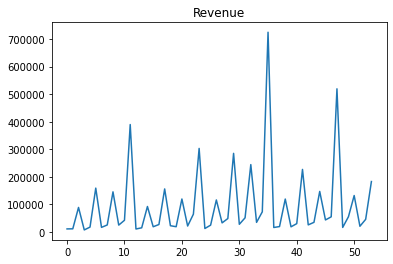

In [9]:
data['Revenue'].plot(title = 'Revenue')

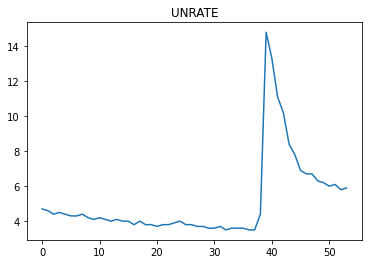

In [10]:
data['UNRATE'].plot(title = 'UNRATE')

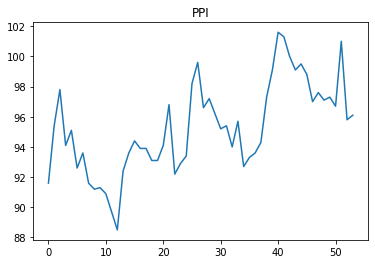

In [11]:
data['PPI'].plot(title = 'PPI')

Train-Test split

In [12]:
partition = 48
total_len = len(data_use)
print(total_len)

54


In [13]:
data_use_train = data_use[ : partition]
data_use_test = data_use[partition : total_len]

In [14]:
data_use_test.shape

(6, 3)

In [15]:
data_use_train.shape

(48, 3)

Model Building

In [16]:
# construct model on training set
model = VAR(data_use_train)

Fitting

In [17]:
lags = 6

In [18]:
# Fit model using 'lags' number of lags
results = model.fit(lags)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 09, Aug, 2021
Time:                     13:03:43
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    27.5439
Nobs:                     42.0000    HQIC:                   26.0500
Log likelihood:          -650.684    FPE:                1.07148e+11
AIC:                      25.1856    Det(Omega_mle):     3.49737e+10
--------------------------------------------------------------------
Results for equation Revenue
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const        -983201.680149    851002.345716           -1.155           0.248
L1.Revenue        -0.053156         0.160997           -0.330           0.741
L1.UNRATE       8660.067968     18630.386859            0.465         

Plot autocorrelation function

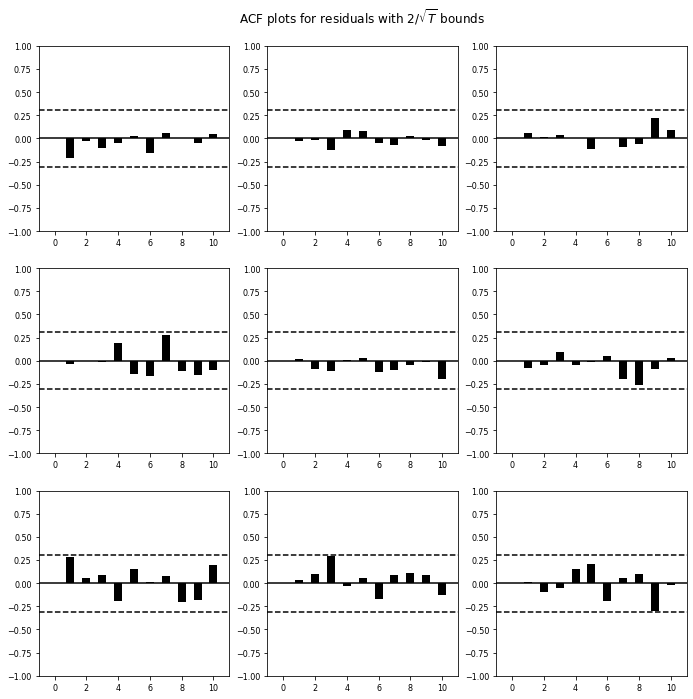

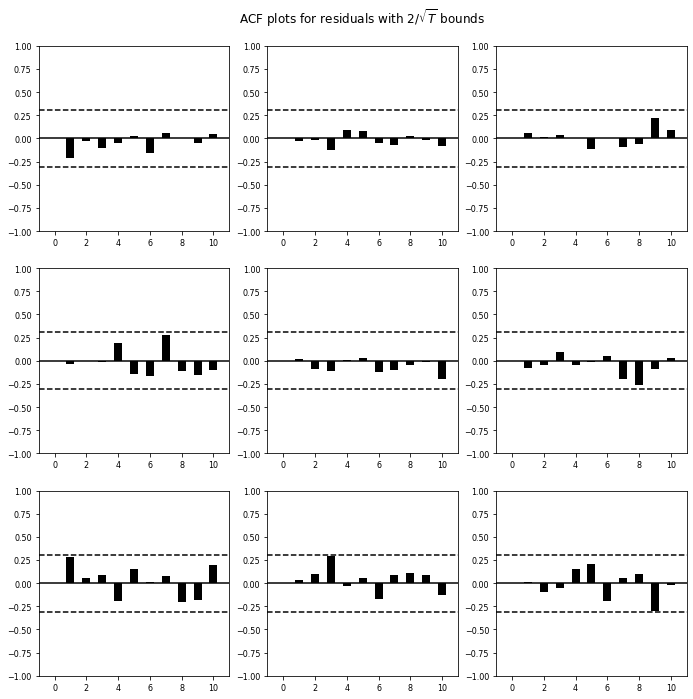

In [19]:
results.plot_acorr()

Forecasting on test set

In [20]:
lag_order = results.k_ar
forecast_results = results.forecast(data_use_test.values,lags)

In [21]:
forecast_results.shape

(6, 3)

Store each Forecasted columns separately for plotting purposes

In [22]:
forecast_results_Revenue = []
forecast_results_UNRATE = []
forecast_results_PPI = []

In [23]:
for i in forecast_results:
  forecast_results_Revenue.append(i[0])
  forecast_results_UNRATE.append(i[1])
  forecast_results_PPI.append(i[2])

Calculate MSE and R Squared Scores

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
r_squared = r2_score(data_use_test, forecast_results)
mse = mean_squared_error(data_use_test, forecast_results)
rmse = math.sqrt(mse)

In [25]:
rmse

40352.76836759743

In [26]:
r_squared

-7.706858035358746

Plot forecasting results

In [27]:
#Create X-axis labels
x_axis_labels = []

#dictionary to keep track of current year
vis = dict()
vis[2017] = 0
vis[2018] = 0
vis[2019] = 0
vis[2020] = 0
vis[2021] = 0

for i in range(len(data)):
    cur_date = data.iloc[i,0]
    cur_year = cur_date[-4:]

    if vis[int(cur_year)] == 0:
      vis[int(cur_year)] = 1
      x_axis_labels.append(cur_year)

    else:
      x_axis_labels.append(' ')
    

In [28]:
x_axis_labels

['2017',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '2018',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '2019',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '2020',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '2021',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ']

In [29]:
dates_train = data['Date'][:partition]
dates_test = data['Date'][partition:total_len]

Plot Revenue Forecast plot

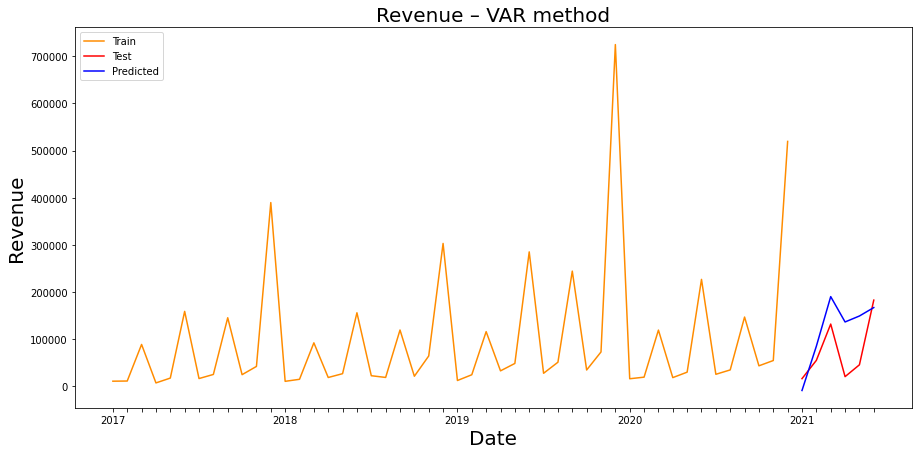

In [30]:
plt.figure(figsize=(15, 7))
font = {'weight': 'normal', 'size': 20}
plt.title('Revenue – VAR method', fontdict=font)
plt.plot(dates_train , data_use_train['Revenue'], color = 'darkorange', label="Train")
plt.plot(dates_test, data_use_test['Revenue'], color = 'red', label="Test")
plt.plot(dates_test, forecast_results_Revenue, color = 'blue', label="Predicted")
plt.legend(loc="upper left")
plt.xticks(np.arange(len(x_axis_labels)),x_axis_labels)
plt.xlabel("Date" , fontdict=font)
plt.ylabel("Revenue" , fontdict=font)
plt.show()

Plot UNRATE Forecast plot

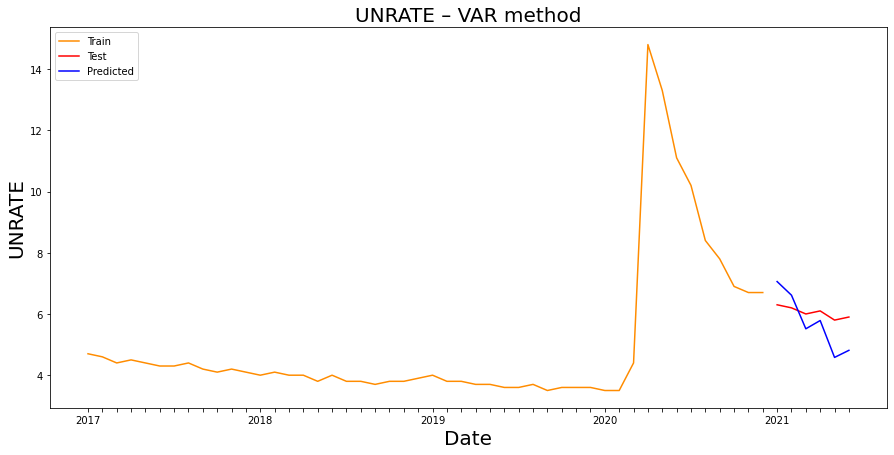

In [31]:
plt.figure(figsize=(15, 7))
font = {'weight': 'normal', 'size': 20}
plt.title('UNRATE – VAR method', fontdict=font)
plt.plot(dates_train , data_use_train['UNRATE'], color = 'darkorange', label="Train")
plt.plot(dates_test, data_use_test['UNRATE'], color = 'red', label="Test")
plt.plot(dates_test, forecast_results_UNRATE, color = 'blue', label="Predicted")
plt.legend(loc="upper left")
plt.xticks(np.arange(len(x_axis_labels)),x_axis_labels)
plt.xlabel("Date" , fontdict=font)
plt.ylabel("UNRATE" , fontdict=font)
plt.show()

Plot PPI Forecast plot

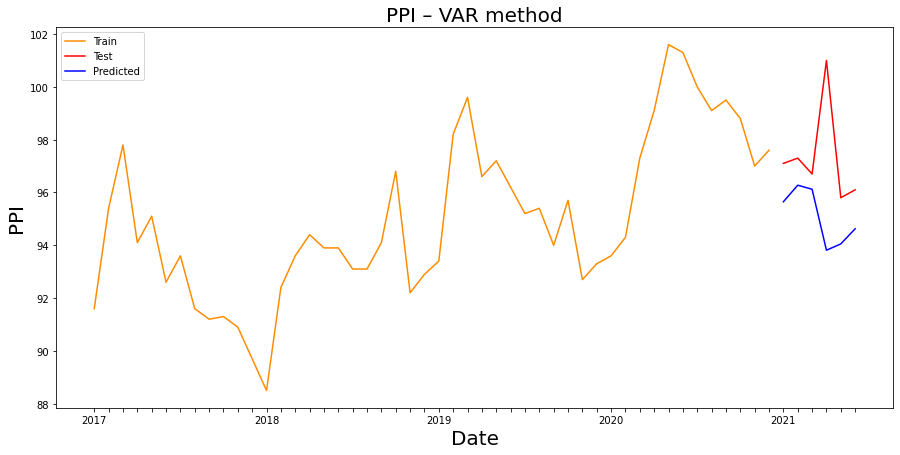

In [32]:
plt.figure(figsize=(15, 7))
font = {'weight': 'normal', 'size': 20}
plt.title('PPI – VAR method', fontdict=font)
plt.plot(dates_train , data_use_train['PPI'], color = 'darkorange', label="Train")
plt.plot(dates_test, data_use_test['PPI'], color = 'red', label="Test")
plt.plot(dates_test, forecast_results_PPI, color = 'blue', label="Predicted")
plt.legend(loc="upper left")
plt.xticks(np.arange(len(x_axis_labels)),x_axis_labels)
plt.xlabel("Date" , fontdict=font)
plt.ylabel("PPI" , fontdict=font)
plt.show()

Impulse Response Function (IRF)

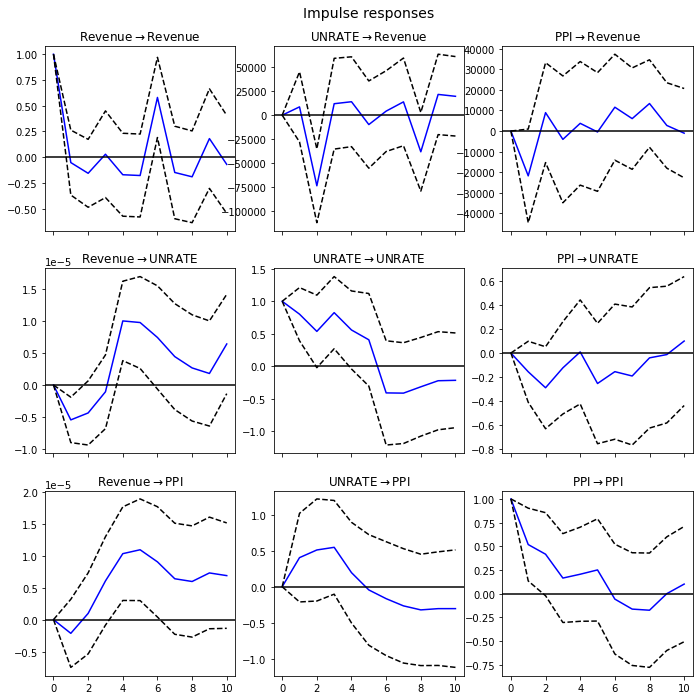

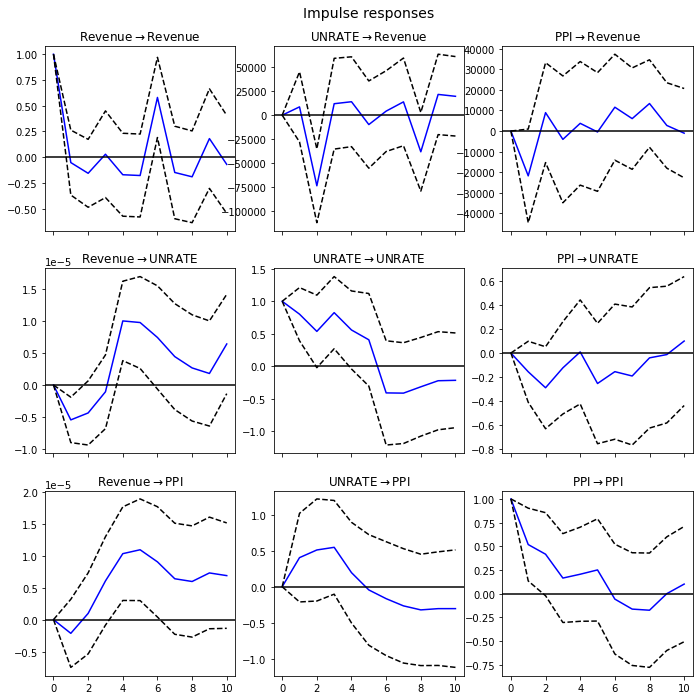

In [33]:
irf = results.irf(10)
irf.plot(orth=False)

Cumulative Effect

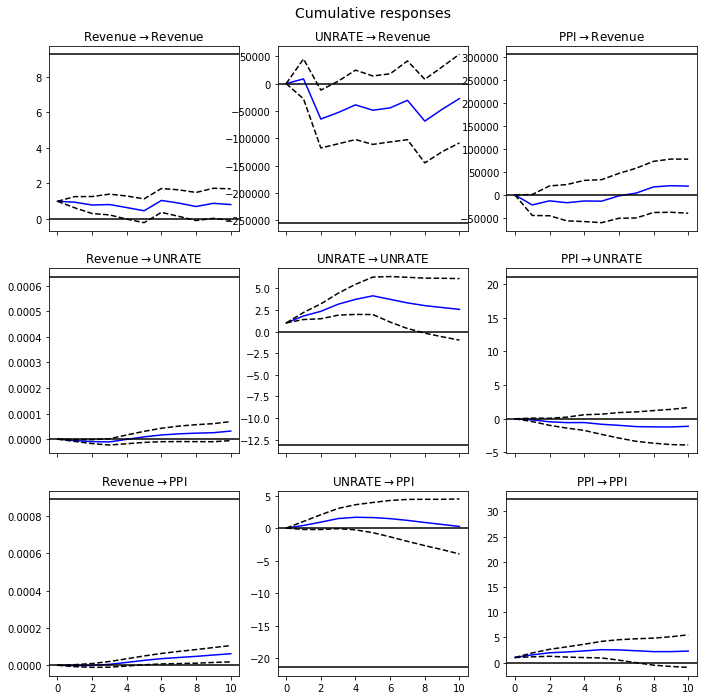

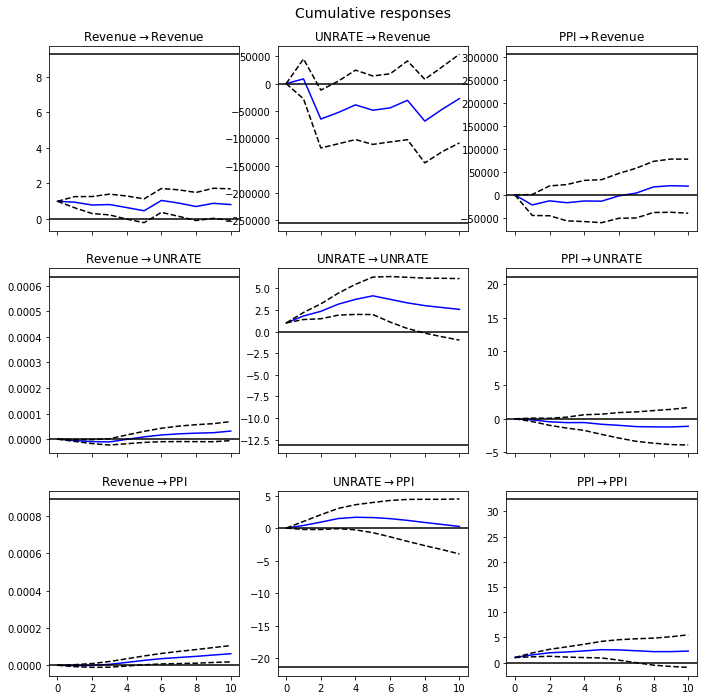

In [34]:
irf.plot_cum_effects(orth=False)